In [230]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import surprise

import hw5_version
import hw5bias_version_g2
import surprise_version
importlib.reload(hw5_version)
importlib.reload(hw5bias_version_g2)
importlib.reload(surprise_version)

%config InlineBackend.figure_format = 'retina'


In [259]:
def visualize_V(U, V, labels=None, index=None, name='temp', save=True, title=None):
    A, s, B = np.linalg.svd(V.T)
    U_proj = A[:,0:2].T@U.T
    V_proj = A[:,0:2].T@V.T
    plt.figure(figsize=(8,4))
    if index is None:
        plot = sns.scatterplot(V_proj[0,:],V_proj[1,:])
    else : 
        plot = sns.scatterplot(V_proj[0,index-1],V_proj[1,index-1])
        
    limits = plt.ylim()
    offset = (limits[1]-limits[0])*0.02
    if not (labels is None):
        for i, label in enumerate(labels):
            txt = plot.text(V_proj[0,index[i]-1],V_proj[1,index[i]-1]+offset, label, horizontalalignment='center')
            relative_location = (V_proj[0,index[i]-1]-plt.xlim()[0])/(plt.xlim()[1] - plt.xlim()[0]) 
            if relative_location < 0.2:
                txt.set(horizontalalignment='left')
            elif relative_location > 0.8:
                txt.set(horizontalalignment='right')
            
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    if save:
        fig = plot.get_figure()
        fig.savefig(f'{name}.png')
        fig.savefig(f'{name}.pdf')
    

In [220]:
def multi_vis(U, V, name='temp',save=True):
    df = pd.read_csv('./data/movies.txt',sep='\t',header=None)
    movies = df[1]
    
    # Ten Movies of our choice
    choice = np.arange(1,11)
    visualize_V(U,V,index=choice,name=f'{name}_choice',labels=movies[choice-1],save=save,title=f'Arbitrarily Chosen Movies with {name}')
    
    # Ten Most Popular
    popular = np.array([50, 258, 100, 181, 294, 286, 288, 1, 300, 121])
    visualize_V(U,V,index=popular,name=f'{name}_popular',labels=movies[popular-1],save=save,title=f'Most Popular Movies with {name}')
    
    # Ten Best
    best = np.array([1189, 1500, 814, 1536, 1293, 1599, 1653, 1467, 1122, 1201])
    visualize_V(U,V,index=best,name=f'{name}_best',labels=movies[best-1],save=save,title=f'\'Best\' Movies with {name}')
    
    # Ten from each of three genres
    animation = np.array([1, 71, 95, 99, 101, 102, 103, 114, 169, 189])
    documentaries = np.array([32, 48, 75, 115, 119, 320, 360, 634, 644, 645])
    sci_fi = np.array([7, 38, 39, 50, 62, 82, 84, 89, 96, 101])
    # Genre 1
    visualize_V(U,V,index=animation,name=f'{name}_animation',labels=movies[animation-1],save=save,title=f'Animation Movies with {name}')
    # Genre 2
    visualize_V(U,V,index=documentaries,name=f'{name}_documentary',labels=movies[documentaries-1],save=save,title=f'Documentary Movies with {name}')
    # Genre 3
    visualize_V(U,V,index=sci_fi,name=f'{name}_scifi',labels=movies[sci_fi-1],save=save,title=f'SciFi Movies with {name}')

In [221]:
Y_train = np.loadtxt('./data/train.txt').astype(int)
Y_test = np.loadtxt('./data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


K = 20
eta = 0.03
reg = 0
reg = 0.1


# Using the Homework 5 version of SVD 

In [222]:
U,V, e_in_base = hw5_version.train_model(M, N, K, eta, reg, Y_train)

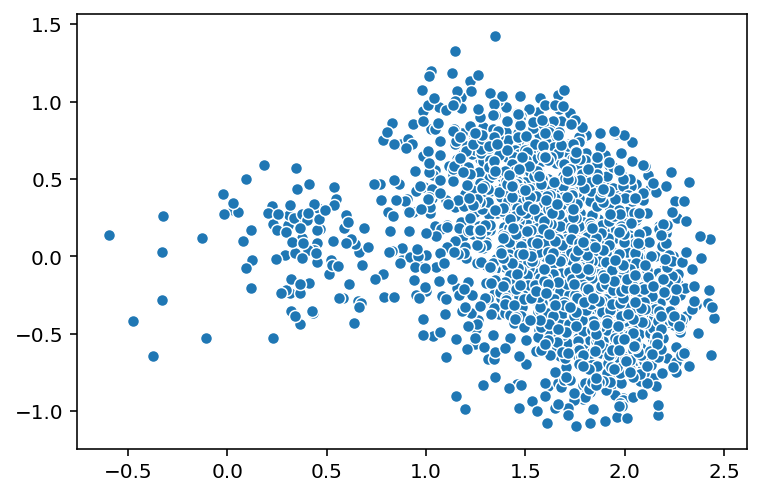

In [223]:
visualize_V(U,V)

In [224]:
print(e_in_base)
e_out_base = hw5_version.get_err(U,V,Y_test)
print(hw5_version.get_err(U,V,Y_test))

0.2799761554891516
0.4472635926801705


# Using the implementation with the additional bias terms

In [225]:
U_bias, V_bias, a_bias, b_bias, mu_bias, e_in_bias = hw5bias_version_g2.train_model(M, N, K, eta, reg, Y_train)

297.1565259259259
3.5295111111111113
0
168.96275104027688


In [234]:
print(e_in_bias)
e_out_bias = hw5bias_version_g2.get_err(U_bias,V_bias, Y_test, a_bias, b_bias, mu_bias)
print(e_out_bias)

0.36877543313890315
0.44098687412650334


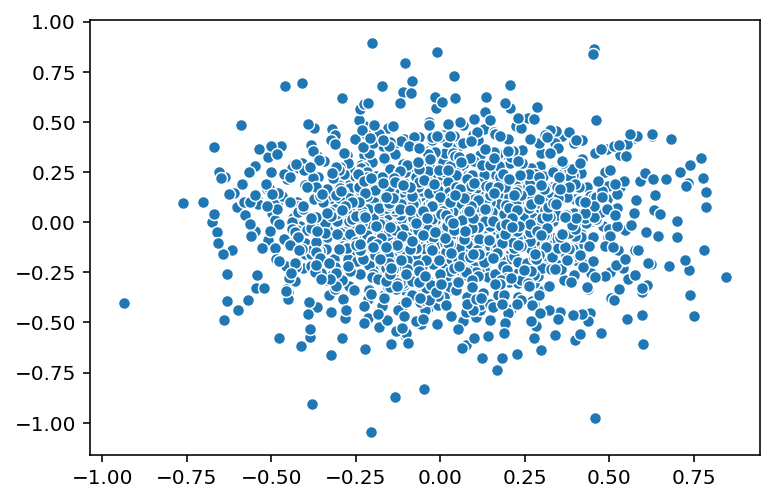

In [235]:
visualize_V(U_bias,V_bias)

# Using the off the shelf implementation of SVD.

In [236]:
model,  e_in_sur = surprise_version.train_model(M, N, K, eta, reg, Y_train)

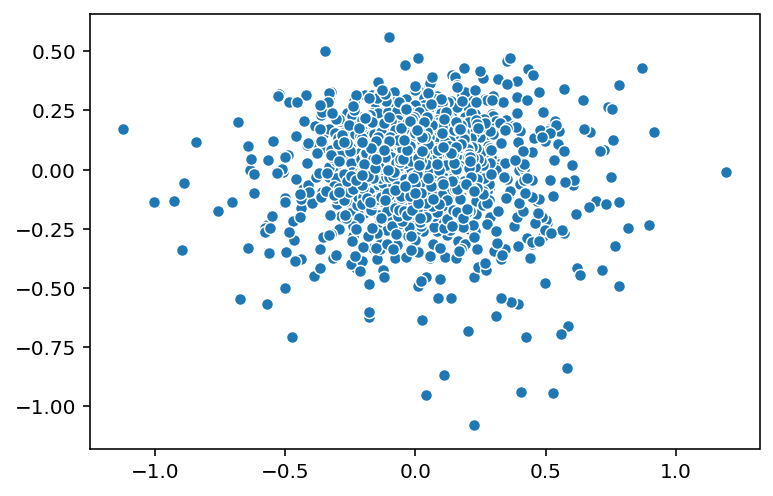

In [237]:
visualize_V(model.pu,model.qi)

In [238]:
print(e_in_sur)
e_out_sur = surprise_version.get_err(model,Y_test)
print(surprise_version.get_err(model,Y_test))

0.6425225646214912
0.6588039050621345


# Create the visualizations

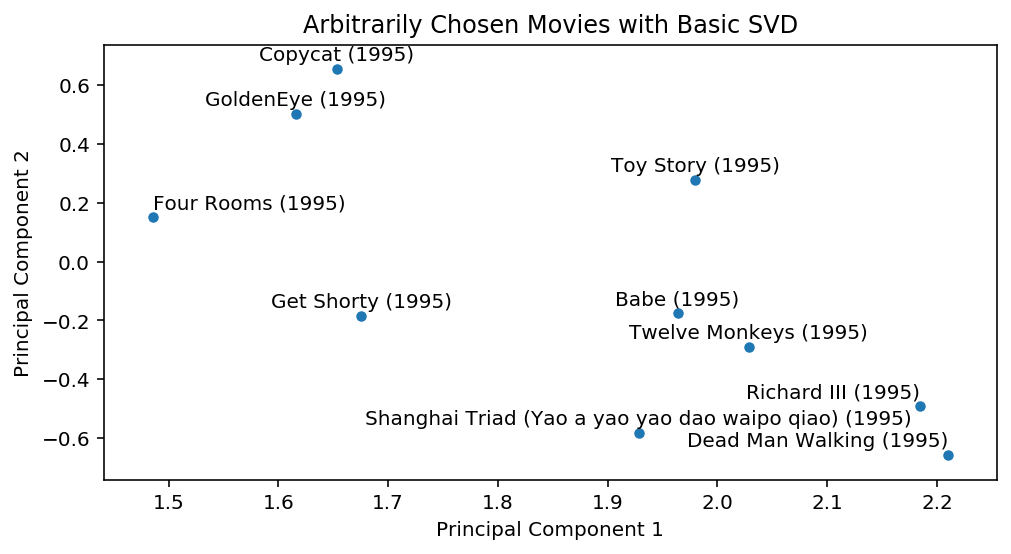

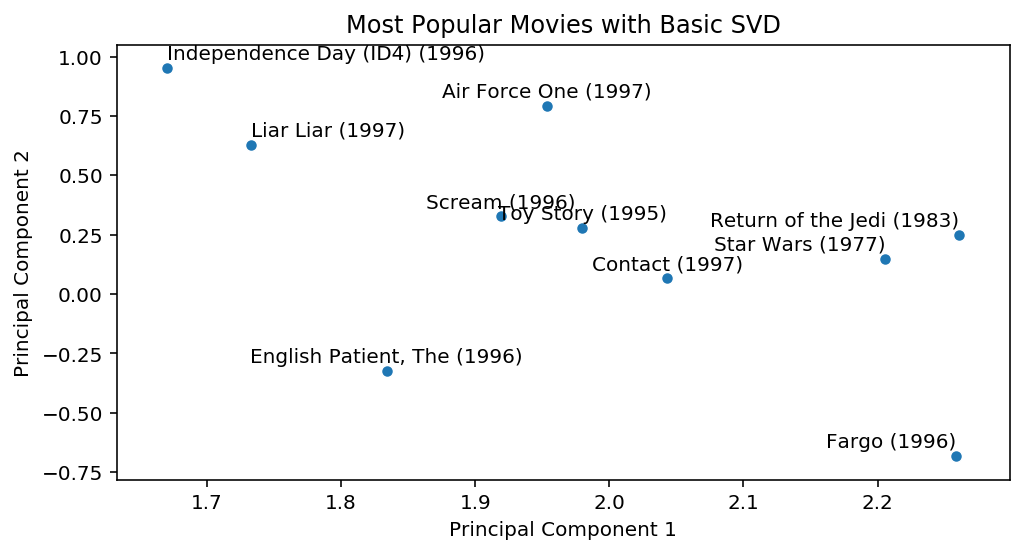

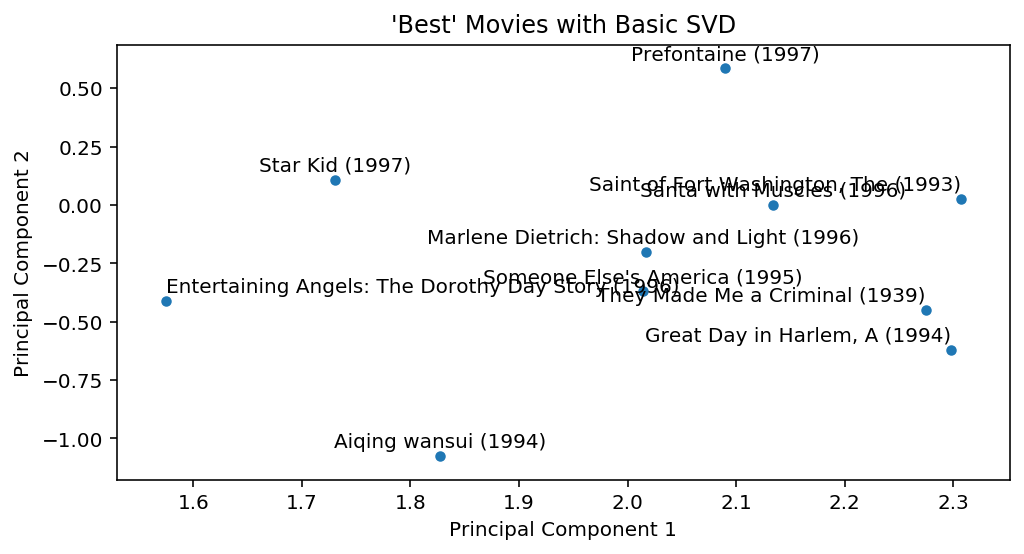

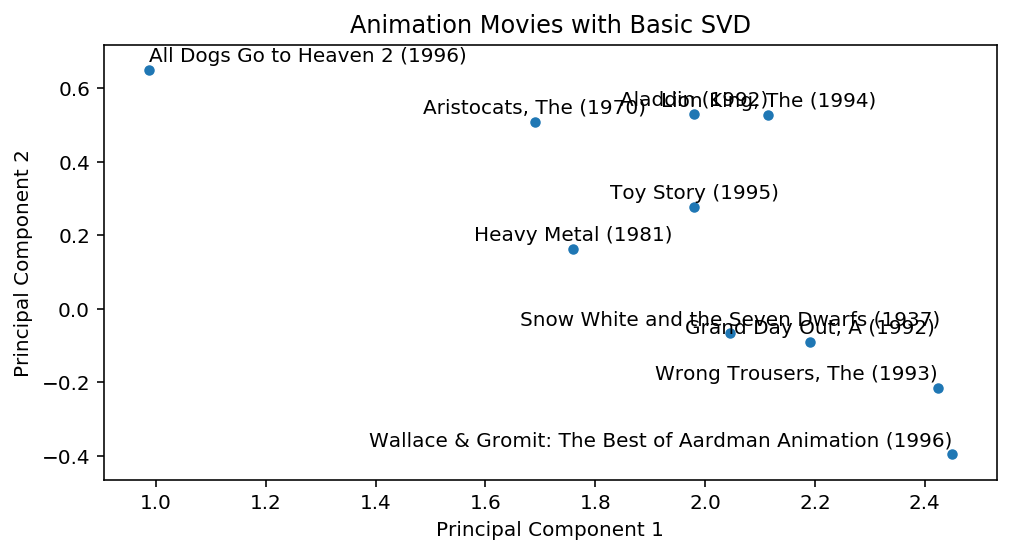

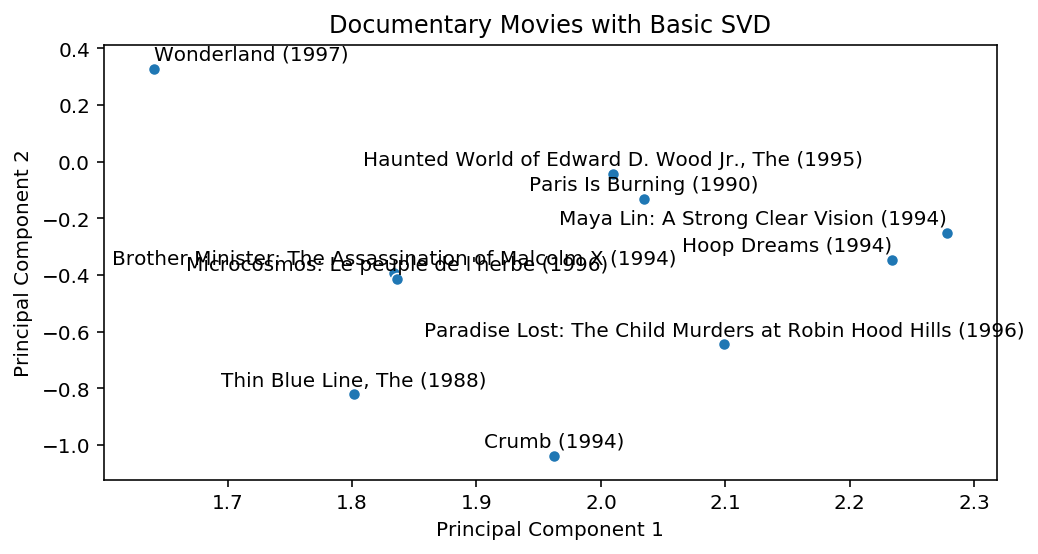

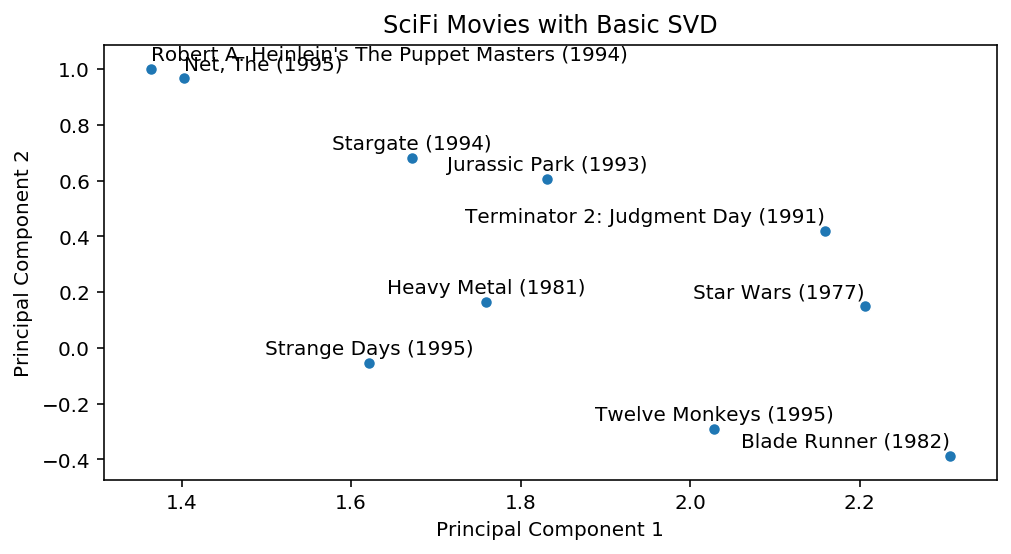

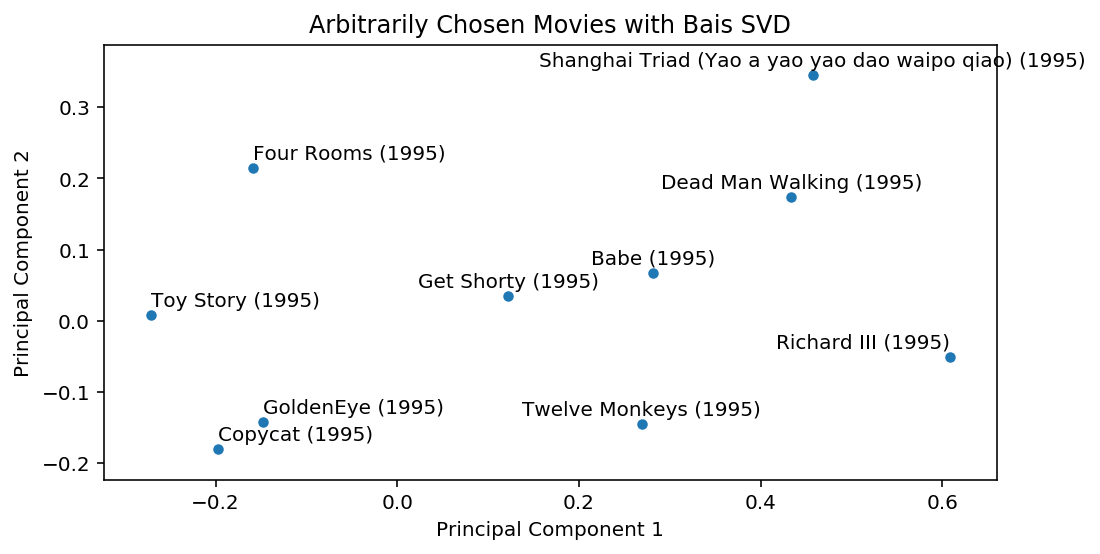

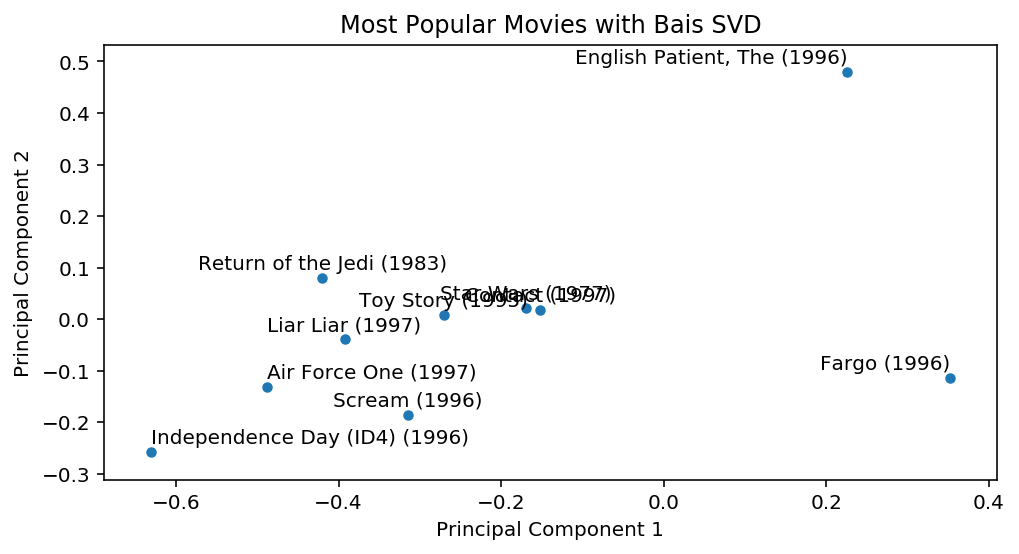

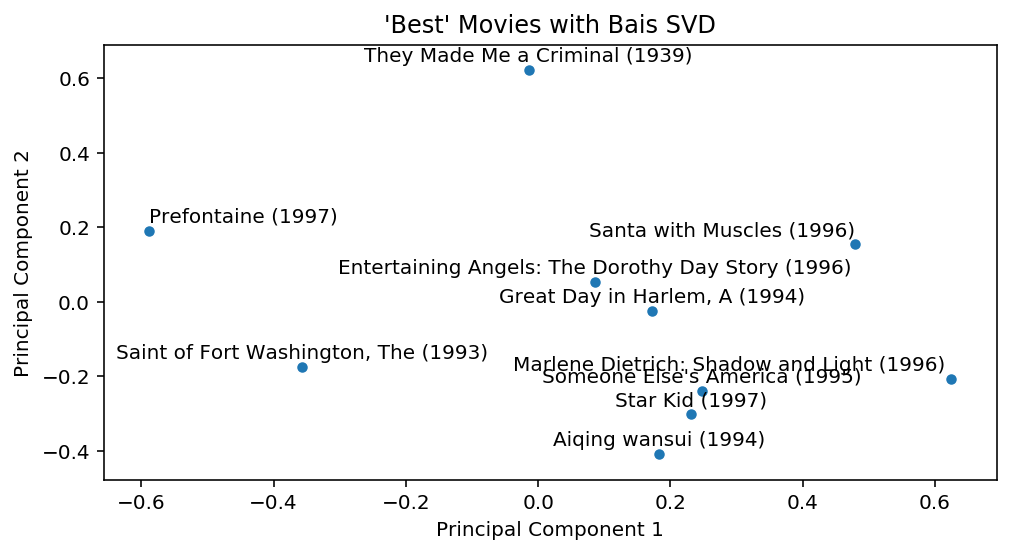

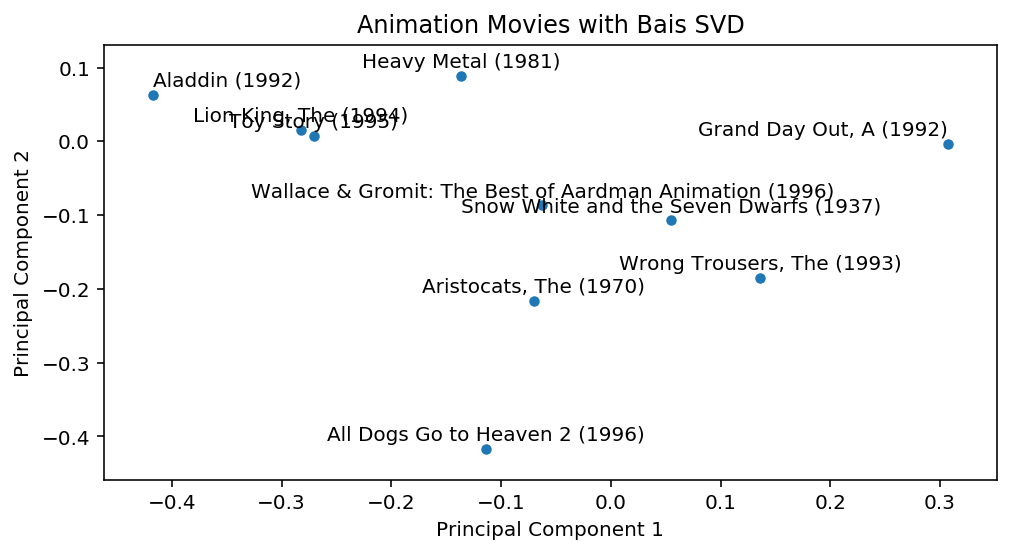

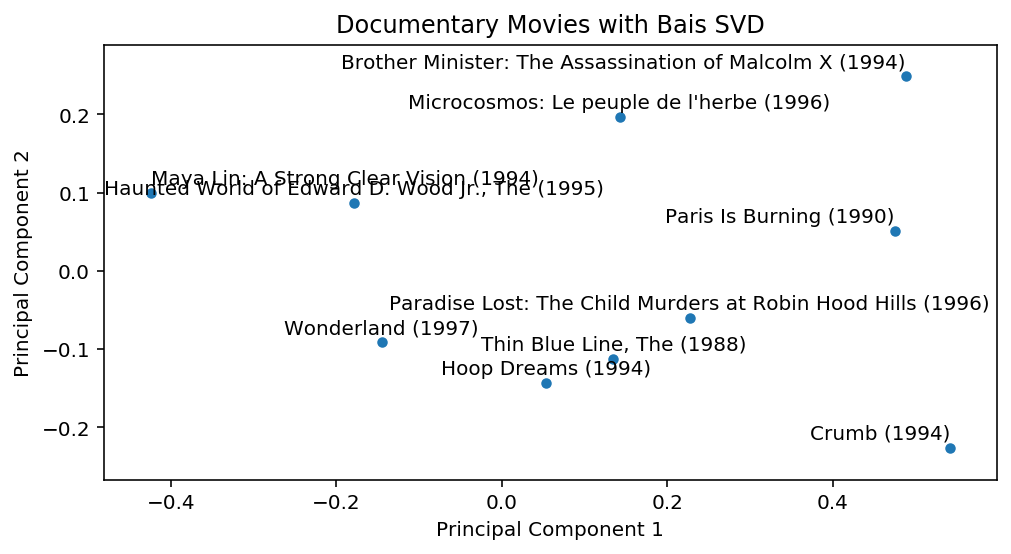

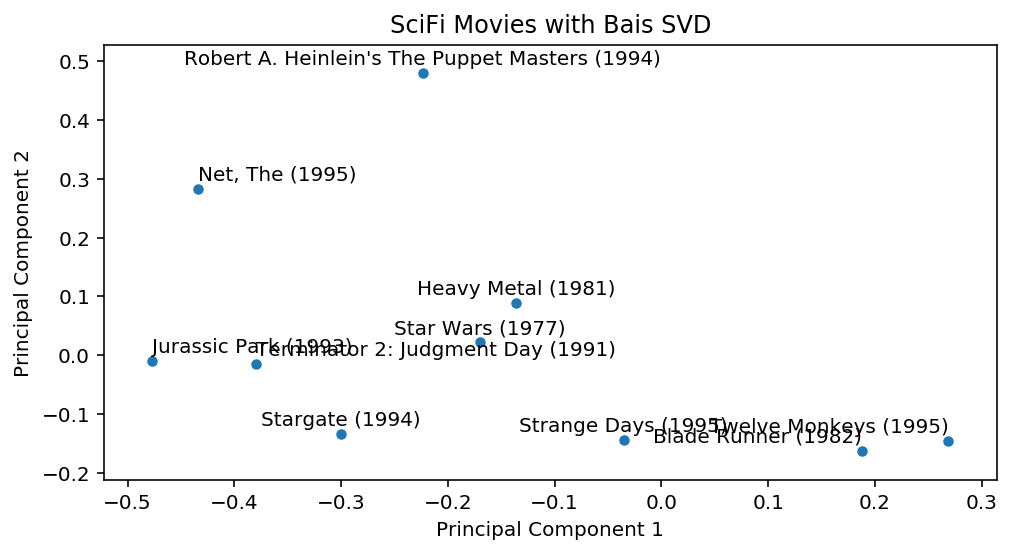

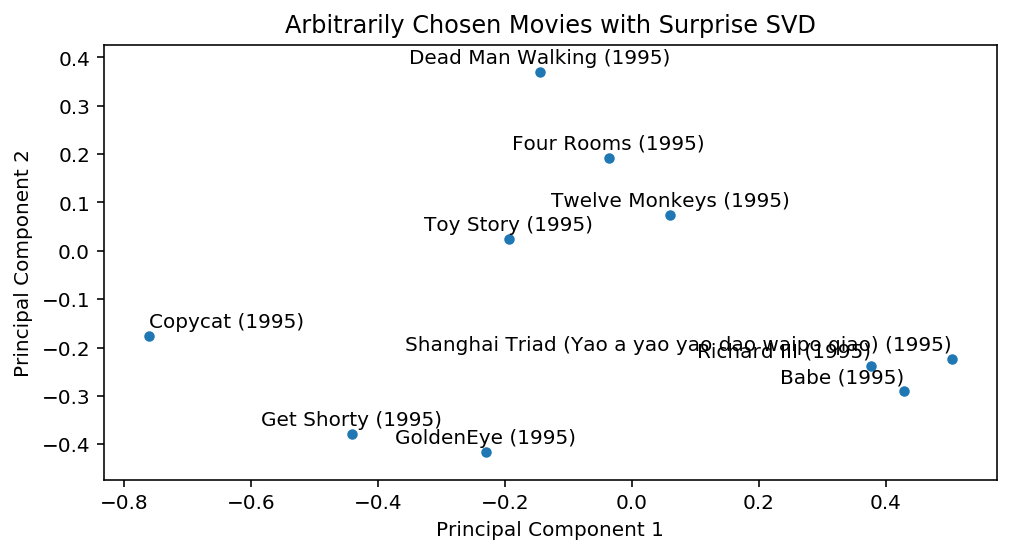

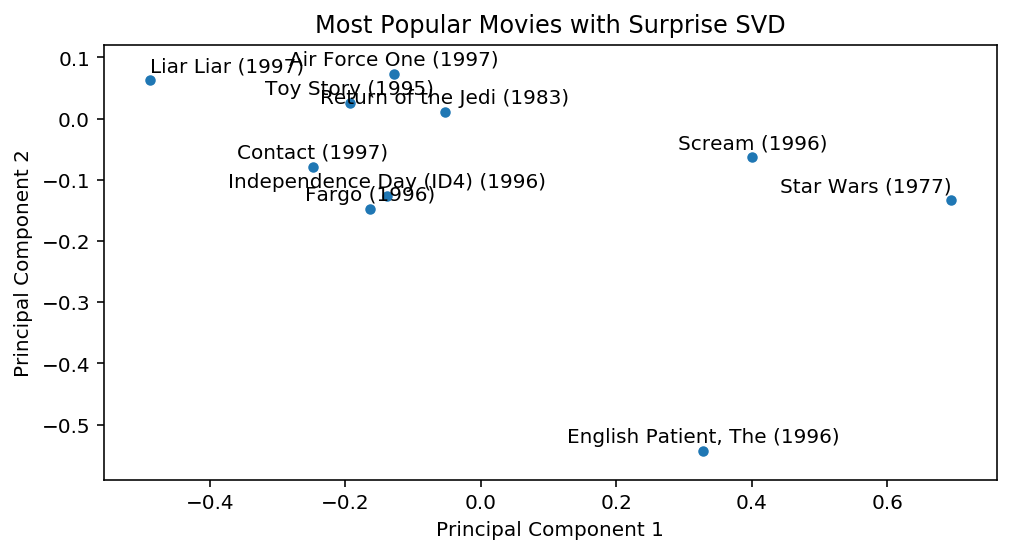

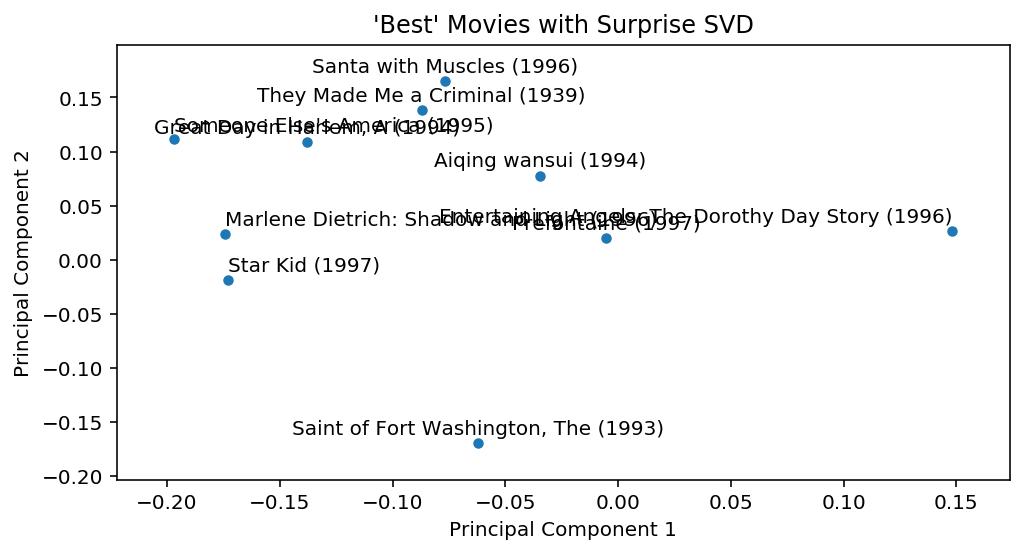

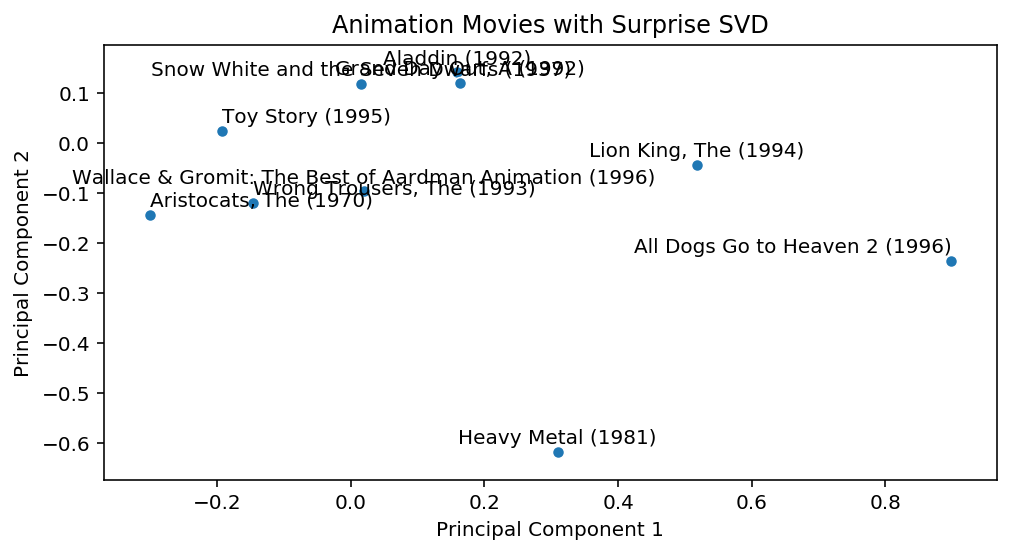

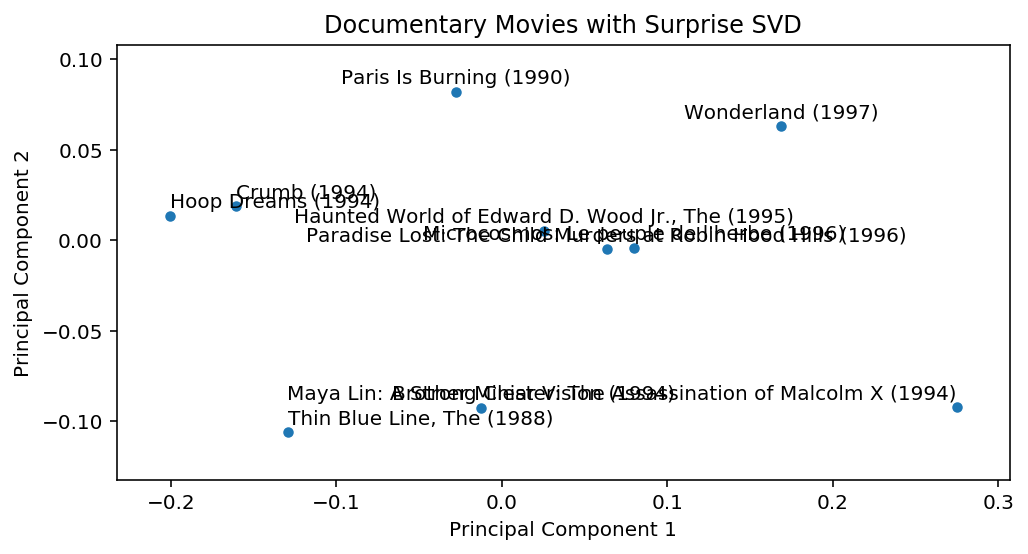

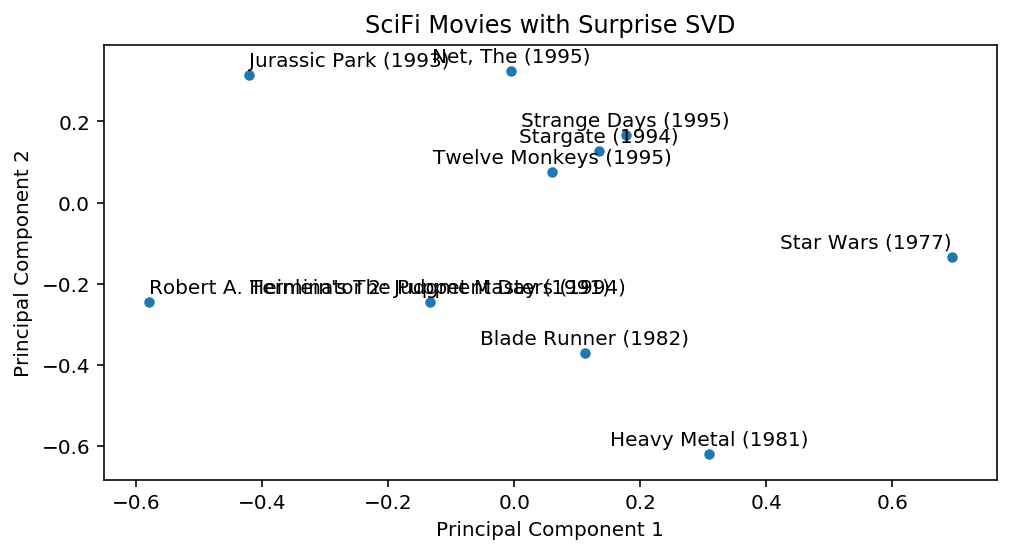

In [260]:
multi_vis(U,V,name='Basic Factorization')
multi_vis(U_bias,V_bias,name='Factorization with Bias')
multi_vis(model.pu,model.qi,name='Surprise Factorization')

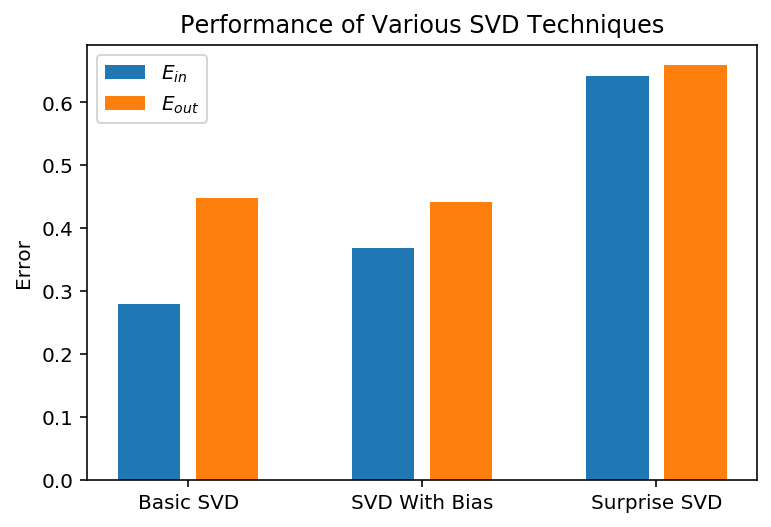

In [240]:

temp = np.array([[e_in_base,e_out_base],[e_in_bias,e_out_bias],[e_in_sur,e_out_sur]])
for i in range(2):
    plt.bar(x=np.arange(0,3)*3+i-0.5,height=temp[:,i])
    plt.legend(['$E_{in}$','$E_{out}$'])
    plt.title('Performance of Various Factorization Techniques')
    plt.ylabel('Error')
    plt.xticks(np.arange(0,3)*3, ['Basic Factorization', 'Factorization With Bias', 'Surprise Factorization'])
    
name = 'performace'
plt.savefig(f'{name}.png')
plt.savefig(f'{name}.pdf')